In [4]:
#importamos pandas para leer la data en df
import pandas as pd
#con pandas_gbq es para interactuar con bigquery
import pandas_gbq

# Objetivo: Vamos a crear la conexión con BigQuery y vamos a leer mediante
# consulta SQL desde Python.
# Generamos conexion a bigquery

from google.oauth2 import service_account # para generar conexion
bq_cred = service_account.Credentials.from_service_account_file('cedar-pottery-388916-edca8400ae77.json')      

sql = "SELECT latitude, longitude, avg_rating, category FROM `cedar-pottery-388916.conjunto_2.gmap_metadata` LIMIT 500000"
gmap_metadata = pd.read_gbq(sql, project_id='cedar-pottery-388916', credentials = bq_cred, dialect='standard')

gmap_metadata = gmap_metadata.dropna(subset=['latitude','longitude','avg_rating','category'])

sql = "SELECT latitude, longitude, stars, categories FROM `cedar-pottery-388916.conjunto_2.yelp_business` LIMIT 500000"
yelp_reviews = pd.read_gbq(sql, project_id='cedar-pottery-388916', credentials = bq_cred, dialect='standard')

yelp_reviews = yelp_reviews.dropna(subset=['latitude', 'longitude', 'stars', 'categories'])

In [5]:
gmap_metadata["category"] = gmap_metadata["category"].apply(eval)

# Pasamos a Dummies las categorías
lista_resultante_GoogleMaps = ['Shaving Ice', 'Weight Loss Centers', 'Eyelash salon', 'Barbershop', 'Nail salon', 'Tanning', 'Reflexology', "Women's clothing store", 'Perfume store', 'Massage', 'Massage Therapy', 'Spray Tanning', 'Beauty', 'Cosmetology Schools', 'Eyebrow Services', 'Shaved Snow', 'Jewelry engraver', 'Hair Extensions', 'Clothing alteration service', 'Skin care clinic', 'Nail Technicians', 'Beauty school', 'Day spa', 'Cosmetics store', 'Rolfing', 'Musical instrument repair shop', 'Shoe repair shop', 'Hair Stylists', 'Permanent Makeup', 'Tanning salon', 'Threading Services', 'Beauty product supplier', 'Beauty & Spas', 'Medical Spas', 'Beauty salon', 'Makeup artist', 'Photo shop', 'Boot repair shop', 'Blow Dry/Out Services', 'Body Contouring', 'Saunas', 'Hair removal service', 'Hair salon', 'Tattoo and piercing shop', 'Electrolysis hair removal service', 'Massage studio', 'Naturopathic/Holistic', 'Orthodontist', 'Spa', 'Clothing store', 'Makeup Artists', 'Beauty products wholesaler', 'Tattoo', 'Skin Care', 'Halotherapy', 'Facial spa', 'Sewing machine repair service', 'Quilt shop', 'Hair Removal', 'Eyelash Service', 'Hair Salons', 'Permanent make-up clinic', 'Cosmetics & Beauty Supply', 'Eyelash service', 'Piercing', 'Cosmetic dentist', 'Wig shop', 'Nail Salons', 'Camera store', 'Waxing']


# Filtrar las filas que contienen al menos una categoría permitida
gmap_metadata = gmap_metadata[gmap_metadata['category'].apply(lambda categories: any(category in categories for category in lista_resultante_GoogleMaps))]

gmap_metadata = gmap_metadata.reset_index(drop=True)

In [6]:
lista_resultante_Yelp = ['Acne Treatment', 'Aestheticians', 'Art Restoration', 'Artificial Turf', 'Barbers', 'Beauty & Spas', 'Boudoir Photography', 'Body Contouring', 'Body Shops', 'Chiropractors', 'Clothing Rental', 'Cosmetic Dentists', 'Cosmetic Surgeons', 'Cosmetics & Beauty Supply', 'Cosmetology Schools', 'Costume', 'Country Dance Halls', 'Creperies', 'Cryotherapy', 'Customized Merchandise', 'Dance Studios', 'Dance Wear', 'Day Spas', 'Delicatessen', 'Dermatologists', 'Dietitians', 'Dim Sum', 'Dry Cleaning', 'Dry Cleaning & Laundry', 'Ear Nose & Throat', 'Editorial Services', 'Egyptian', 'Electrolysis Hair Removal', 'Embroidery & Crochet', 'Estheticians', 'Eyebrow Services', 'Eyelash Service', 'Eyewear & Opticians', 'Face Painting', 'Facial Rejuvenation', 'Family Practice', 'Fashion', 'Fitness & Instruction', 'Fitness/Exercise Equipment', 'Florists', 'Flowers & Gifts', 'Formal Wear', 'French', 'General Dentistry', 'Glass & Mirrors', 'Greek', 'Hair Extensions', 'Hair Loss Centers', 'Hair Removal', 'Hair Salons', 'Hair Stylists',  'Hats', 'Henna Artists', 'Holistic Animal Care', 'Beauty Salons', 'Cosmetics & Beauty Supply', 'Day Spas', 'Eyebrow Services', 'Eyelash Service', 'Hair Removal', 'Hair Salons', 'Makeup Artists', 'Massage', 'Medical Spas', 'Nail Salons', 'Perfume', 'Skin Care', 'Tanning Salons', 'Tattoo', 'Waxing', 'Nail Salons', 'Nail Technicians', 'Naturopathic/Holistic', 'Nutritionists', 'Hair Salons', 'Hair Extensions', 'Hair Removal', 'Hair Stylists', 'Hair Loss Centers', 'Makeup Artists', 'Cosmetics & Beauty Supply', 'Skin Care', 'Day Spas', 'Medical Spas', 'Tanning', 'Tattoo', 'Piercing', 'Barbers', 'Massage Therapy', 'Massage', 'Eyebrow Services', 'Eyelash Service', 'Waxing', 'Hair Replacement', 'Wigs', 'Perfume', 'Beauty Supply', 'Acupuncture', 'Chiropractors', 'Reflexology', 'Permanent Makeup', 'Tattoo Removal', 'Weight Loss Centers', 'Pilates', 'Dance Studios', 'Fitness & Instruction', 'Gyms', 'Trainers', 'Saunas', 'Meditation Centers', 'Float Spa', 'Cryotherapy', 'Spray Tanning', 'Piercing', 'Medical Spas', 'Medical Aesthetics', 'Medical Foot Care', 'Medical Supplies', 'Medical Transportation', 'Permanent Makeup', 'Perfume', 'Personal Care Services', 'Photographers', 'Photography Classes', 'Photography Stores & Services', 'Physical Therapy', 'Piercing', 'Pilates', 'Plastic Surgeons', 'Skin Care', 'Spray Tanning', 'Sunglasses', 'Surgeons', 'Swimwear', 'Tanning', 'Tanning Beds', 'Tattoo', 'Tattoo Removal', 'Teeth Whitening', 'Traditional Clothing', 'Traffic Ticketing Law', 'Uniforms', 'Video/Film Production', 'Videographers', 'Vintage & Consignment', 'Vitamins & Supplements', 'Waxing', 'Weight Loss Centers', 'Wigs', "Women's Clothing"]


yelp_reviews = yelp_reviews[yelp_reviews['categories'].str.split(', ').apply(lambda x: any(category in lista_resultante_Yelp for category in x))]

yelp_reviews = yelp_reviews.reset_index(drop=True)

In [7]:
gmap_metadata.drop(columns='category', inplace=True)
yelp_reviews.drop(columns='categories', inplace=True)

In [8]:
yelp_reviews.rename(columns={'stars': 'avg_rating'}, inplace=True)

In [9]:
data_area = pd.concat([gmap_metadata, yelp_reviews], ignore_index=True)


# Clustering - USA

C:\Users\gonza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


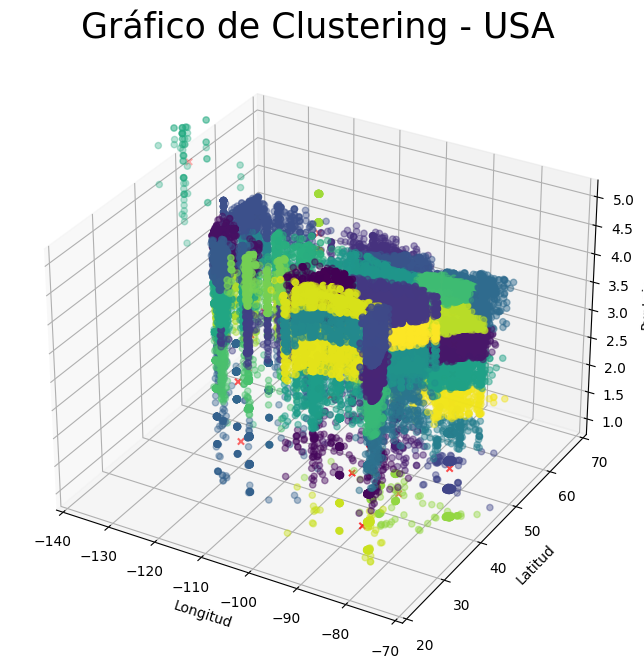

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Obtener los datos de PruebaUbi
X = data_area[['latitude', 'longitude', 'avg_rating']]

# Escalar las variables de entrada
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar el algoritmo de clustering K-means
kmeans = KMeans(n_clusters=50, random_state=42)
kmeans.fit(X_scaled)

# Obtener los centroides de cada cluster
centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Obtener las etiquetas de cluster asignadas a cada punto
labels = kmeans.labels_

# Crear una figura 3D
fig = plt.figure(figsize=(8, 8))

ax = fig.add_subplot(111, projection='3d')


# Graficar los puntos con colores de acuerdo a los clusters
ax.scatter3D(X['longitude'], X['latitude'], X['avg_rating'], c=labels)

# Graficar los centroides con un marcador diferente
ax.scatter3D(centers[:, 1], centers[:, 0], centers[:, 2], c='red', marker='x')

# Configurar etiquetas de los ejes con los valores originales
plt.title('Gráfico de Clustering - USA', fontsize=25)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_zlabel('Puntaje')
ax.zaxis.set_label_coords(0.01, 1.1)

# Establecer el límite del eje x (longitud)
ax.set_xlim(-140, -70)
ax.set_ylim(20, 70)


# Mostrar la figura
plt.show()


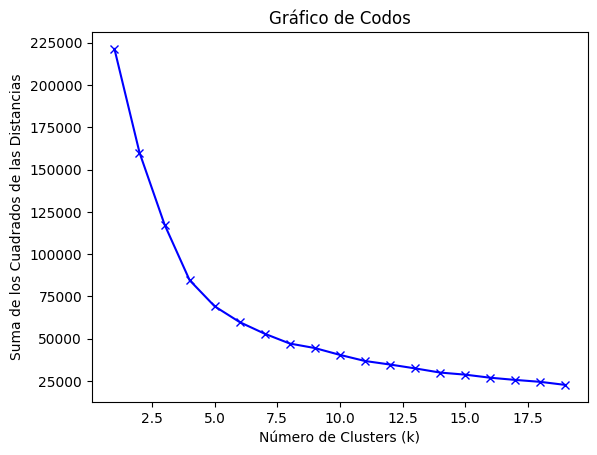

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import warnings

# Configurar el filtro para ignorar las advertencias de nivel predeterminado
warnings.filterwarnings('ignore')

# Código que genera las advertencias

# Cargar el dataset


# Extraer las variables de entrada (latitud, longitud y puntaje)
X = data_area[['latitude', 'longitude', 'avg_rating']]

# Escalar las variables de entrada
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calcular la suma de los cuadrados de las distancias para diferentes valores de k
sse = []
k_values = range(1, 20)  # Probar diferentes valores de k
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Graficar el gráfico de codos
plt.plot(k_values, sse, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Suma de los Cuadrados de las Distancias')
plt.title('Gráfico de Codos')
plt.show()

In [26]:
import warnings
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from geopy.distance import geodesic
import numpy as np

# Restaurar el filtro de advertencias a su configuración original
warnings.filterwarnings('default')

# Seleccionar las columnas relevantes para el clustering
X = data_area[['latitude', 'longitude', 'avg_rating']]

# Escalar las variables de entrada
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar el algoritmo de clustering K-means
kmeans = KMeans(n_clusters=50, random_state=42)
kmeans.fit(X_scaled)

# Obtener el centroide (zona central) de cada cluster y calcular el radio espacial del cluster
centers = scaler.inverse_transform(kmeans.cluster_centers_)

avg_ratios = []
densities = []
proximities = []
competitors = []

for i, center in enumerate(centers):
    cluster_points = data_area.loc[kmeans.labels_ == i, ['latitude', 'longitude']]
    distances = cluster_points.apply(lambda point: geodesic((center[0], center[1]), (point['latitude'], point['longitude'])).kilometers, axis=1)

    cluster_avg_ratings = data_area['avg_rating'][kmeans.labels_ == i]
    avg_ratio = np.mean(cluster_avg_ratings)
    avg_ratios.append(avg_ratio)

    density = len(cluster_points)
    densities.append(density)

    proximity = distances.mean()
    proximities.append(proximity)

    competitor_count = len(data_area[(kmeans.labels_ == i) & (data_area['avg_rating'] > avg_ratio)])
    competitors.append(competitor_count)


# Crear un DataFrame con los resultados
result = pd.DataFrame({'Cluster': range(50),
                       'Centroid Latitude': centers[:, 0],
                       'Centroid Longitude': centers[:, 1],
                       'Avg Ratio': avg_ratios,
                       'Density': densities,
                       'Competitors': competitors})

# Ordenar los clusters por Avg Ratio de mayor a menor
top_clusters = result.sort_values(by='Avg Ratio', ascending=False).head(15)

top_clusters["Avg Ratio"] = top_clusters["Avg Ratio"].apply(round, args=(2,))


from geopy.geocoders import Nominatim

geolocator = Nominatim(user_agent="my_geocoder")

# Función para obtener el estado y la ubicación geográfica
def get_state_location(latitude, longitude):
    location = geolocator.reverse((latitude, longitude), exactly_one=True)
    address = location.raw['address']
    state = address.get('state', '')
    county = address.get('county', '')
    return state, county

# Agregar columnas de estado y ubicación geográfica al DataFrame 'top_clusters'
top_clusters[['State', 'Location']] = top_clusters.apply(lambda row: pd.Series(get_state_location(row['Centroid Latitude'], row['Centroid Longitude'])), axis=1)

top_clusters.drop(columns=["Cluster","Centroid Latitude","Centroid Longitude"], inplace=True)
top_clusters = top_clusters.reset_index(drop=True)


C:\Users\gonza\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [52]:
top_clusters["Porcentaje de competición"] = round((top_clusters["Competitors"])/top_clusters["Density"]*100,2)
top_clusters["Porcentaje de competición"] = top_clusters["Porcentaje de competición"].apply(float)

In [57]:
top_clusters.rename(columns={"Avg Ratio": "Promedio_Puntaje_Reviews", 
                             "Density": "Cantidad de Negocios",
                             "Competitors": "Negocios Competidores",
                             "State": "Estado",
                             "Location": "Condado"
                             }, inplace=True)

In [58]:
top_clusters

,Promedio_Puntaje_Reviews,Cantidad de Negocios,Negocios Competidores,Estado,Condado,Porcentaje de competición
0,4.96,3459,2447,Pennsylvania,Chester County,70.74
1,4.95,1907,1282,Illinois,Fayette County,67.23
2,4.94,1303,803,Louisiana,Cameron Parish,61.63
3,4.90,2518,1234,North Carolina,Macon County,49.01
4,4.87,1252,765,Oregon,Gilliam County,61.10
5,4.80,2171,1350,Michigan,Van Buren County,62.18
6,4.77,1386,815,Massachusetts,Franklin County,58.80
7,4.75,2582,1334,California,Los Angeles County,51.67
8,4.74,4192,2114,Florida,Hillsborough County,50.43
9,4.73,704,373,Minnesota,Wright County,52.98
